# Lab Project 2

## Question A

### Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
import random

def generate_random_graph(num_vertices, max_weight=10, sparsity=0.5):
    """Generates a random directed graph as an adjacency matrix.
    
    Args:
        num_vertices (int): Number of vertices in the graph.
        max_weight (int): Maximum weight for the edges.
        sparsity (float): Probability of creating an edge between any two vertices.
        
    Returns:
        list: Adjacency matrix representing the directed graph.
    """
    graph = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and random.random() < sparsity:  # Avoid self-loops and control edge creation
                weight = random.randint(1, max_weight)  # Random weight between 1 and max_weight
                graph[i][j] = weight

    return graph

In [3]:
class PriorityQueue:
    def __init__(self):
        self.queue = []

    def is_empty(self):
        return len(self.queue) == 0

    def enqueue(self, item, priority):
        """Add an item to the priority queue with the given priority."""
        self.queue.append((priority, item))
        self.queue.sort()  # Sort the queue by priority (ascending)

    def dequeue(self):
        """Remove and return the item with the highest priority (lowest value)."""
        if self.is_empty():
            raise IndexError("dequeue from empty priority queue")
        return self.queue.pop(0)[1]  # Remove and return the item

    def peek(self):
        """Return the item with the highest priority without removing it."""
        if self.is_empty():
            raise IndexError("peek from empty priority queue")
        return self.queue[0][1]  # Return the item

    def remove_item(self, item):
        """Remove the specified item from the priority queue."""
        for index, (priority, queue_item) in enumerate(self.queue):
            if queue_item == item:
                del self.queue[index]  # Remove the item by index
                return  # Exit after removing the item
        raise ValueError(f"Item '{item}' not found in the priority queue.")

    def __str__(self):
        return str(self.queue)

In [4]:
import math
import time

def dijkstra_matrix(adjacency_matrix, source):
    start_time = time.perf_counter()
    n = len(adjacency_matrix)
    
    # Initialize distances, visited array, and predecessor array
    distances = [math.inf] * n
    visited = [False] * n
    predecessors = [None] * n  # Predecessor array

    distances[source] = 0    
    # Initialize the priority queue
    q = PriorityQueue()
    #q.enqueue(source, 0)  #enqueue(self, item, priority):

    for i in range(n):
        q.enqueue(i, distances[i])

    while q.is_empty()==False:
        # Extract the vertex with the smallest distance
        u = q.dequeue()

        # Mark the vertex as visited
        visited[u] = True

        # Explore neighbors
        for v in range(n):
            weight = adjacency_matrix[u][v] # extracts the w[u,v]
            if weight == 0:  # There is no edge
                continue

            if(visited[v]==False and distances[v] > weight+ distances[u]):
                q.remove_item(v)
                distances[v] = weight+ distances[u]
                predecessors[v] = u
                q.enqueue(v, distances[v])
                
    end_time = time.perf_counter()
    #print("time: "+ str((end_time - start_time)))
    return distances, predecessors, (end_time - start_time)

def reconstruct_path(predecessors, target):
    """Reconstruct the path from source to target using the predecessor array."""
    path = []
    while target is not None:
        path.append(target)
        target = predecessors[target]
    path.reverse()  # Reverse to get the path from source to target
    return path


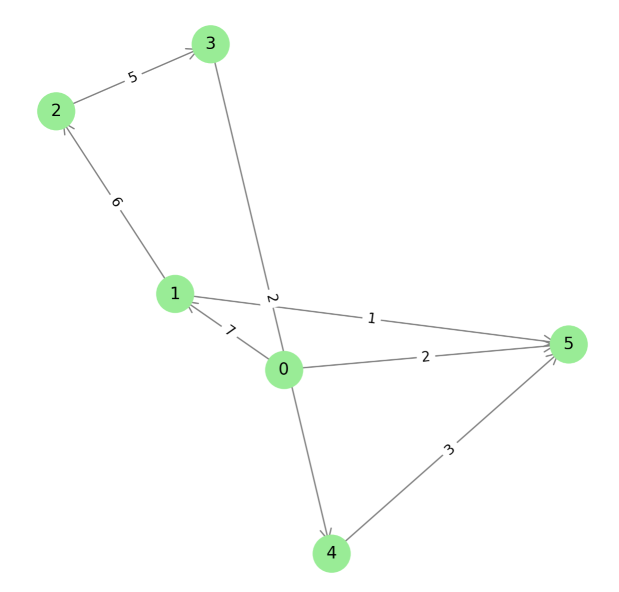

In [5]:
from IPython.display import Image, display

graph = [
        [0, 7, 0, 0, 0, 2],
        [0, 0, 6, 0, 0, 1],
        [0, 0, 0, 5, 0, 0],
        [0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 3],
        [0, 0, 0, 0, 0, 0]
    ]

source_vertex = 0
distances,predecessors, execution_time  = dijkstra_matrix(graph, source_vertex)
print(f"Distances from vertex {source_vertex}: {distances}")
print(f"Execution time: {execution_time:.6f} seconds")

target_vertex =5  # Example target
path = reconstruct_path(predecessors, target_vertex)
print(f"Shortest path from {source_vertex} to {target_vertex}: {path}")

Distances from vertex 0: [0, 7, 13, 18, 20, 2]
Execution time: 0.000029 seconds
Shortest path from 0 to 5: [0, 5]


In [6]:
def analyze_graphs(num_vertices, max_weight, num_graphs):
    for i in range(num_graphs):
        graph =  generate_random_graph(num_vertices, max_weight)
        distances,predecessors, execution_time  = dijkstra_matrix(graph, 0)
        print(f"Distances from vertex {source_vertex}: {distances}")
        print(f"Execution time: {execution_time:.6f} seconds")
        path = reconstruct_path(predecessors, target_vertex)
        print(f"Shortest path from {source_vertex} to {target_vertex}: {path}\n")


analyze_graphs(10, 40, 6)

Distances from vertex 0: [0, 28, 32, 9, 18, 10, 48, 16, 13, 18]
Execution time: 0.000048 seconds
Shortest path from 0 to 5: [0, 5]

Distances from vertex 0: [0, 37, 28, 15, 38, 41, 20, 28, 51, 32]
Execution time: 0.000031 seconds
Shortest path from 0 to 5: [0, 1, 5]

Distances from vertex 0: [0, 5, 10, 22, 25, 24, 4, 17, 13, 27]
Execution time: 0.000029 seconds
Shortest path from 0 to 5: [0, 6, 5]

Distances from vertex 0: [0, 32, 27, 45, 37, 23, 38, 18, 34, 33]
Execution time: 0.000040 seconds
Shortest path from 0 to 5: [0, 5]

Distances from vertex 0: [0, 23, 6, 4, 17, 4, 10, 7, 31, 10]
Execution time: 0.000026 seconds
Shortest path from 0 to 5: [0, 5]

Distances from vertex 0: [0, 35, 54, 39, 23, 9, 52, 32, 10, 25]
Execution time: 0.000025 seconds
Shortest path from 0 to 5: [0, 5]



In [7]:
V_range = range(1, 101)
execution_times = []

for V in V_range:
    total_times = 0
    for _ in range(10):
        graph = generate_random_graph(V)
        distances,predecessors, execution_time  = dijkstra_matrix(graph, 0)
        total_times += execution_time
    average_times = total_times/10
    execution_times.append(average_times)

### Theoretical Analysis

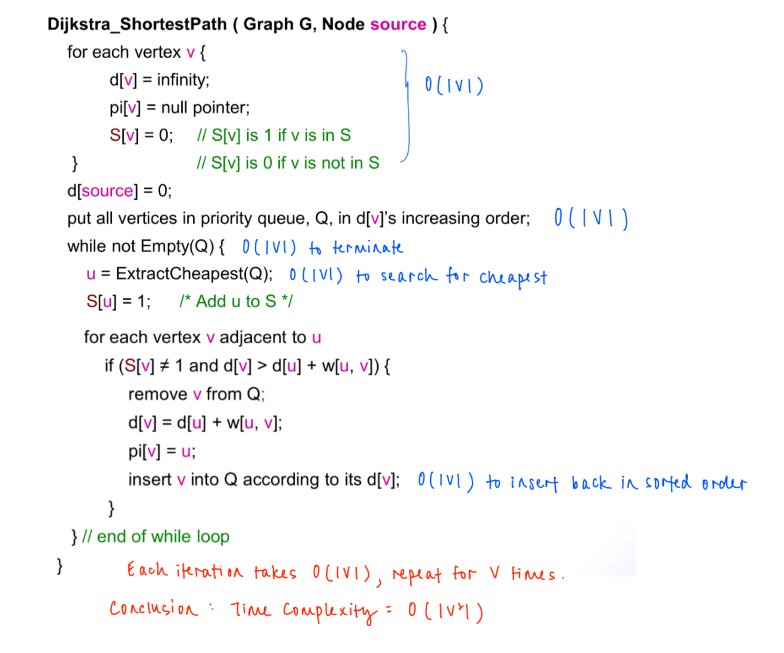

Initialization: Initializing the distances array and priority queue with V vertices takes O(V).  

Sorting: Sorting the vertices in the priority queue takes O(|V^2|).  

Extracting the minimum vertex: Extracting the minimum itself is O(1) but the re-sorting after each insertion of a vertice into the queue cause O(|V|).

Updating neighbors: For each vertex u, the algorithm checks all V possible neighbors. Since the adjacency matrix is used, even if there is no edge between u and some vertex v, the algorithm still loops over all vertices. This takes O(V) time per vertex. 

Total iterations: The above process of finding the smallest vertex and updating neighbors is repeated V times, once for each vertex.

Conclusion: Time Complexity of Dijkstra's algorithm using adjacency matrix is O(|V|²) and independent of |E|.

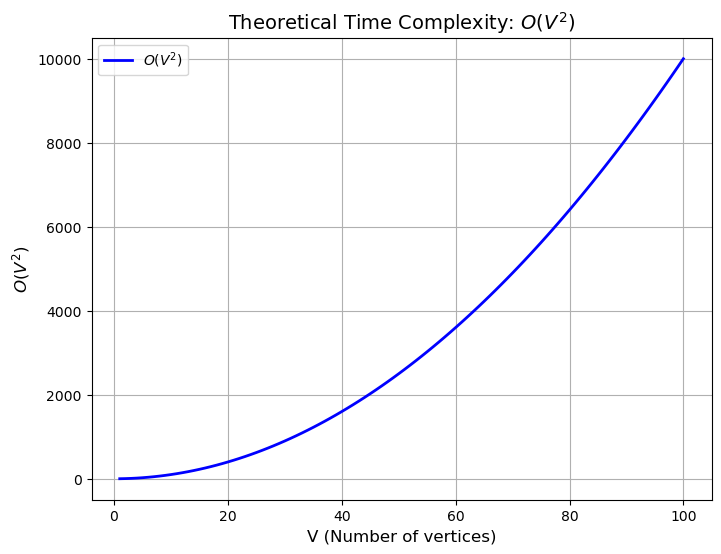

In [8]:
# Generate V values (number of vertices)
V_values = np.arange(1, 101)  # V values from 1 to 100

# Calculate V^2 for each V
V_square_values = V_values ** 2

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(V_values, V_square_values, label="$O(V^2)$", color="b", linewidth=2)
plt.title("Theoretical Time Complexity: $O(V^2)$", fontsize=14)
plt.xlabel("V (Number of vertices)", fontsize=12)
plt.ylabel("$O(V^2)$", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


### Empirical Analysis 

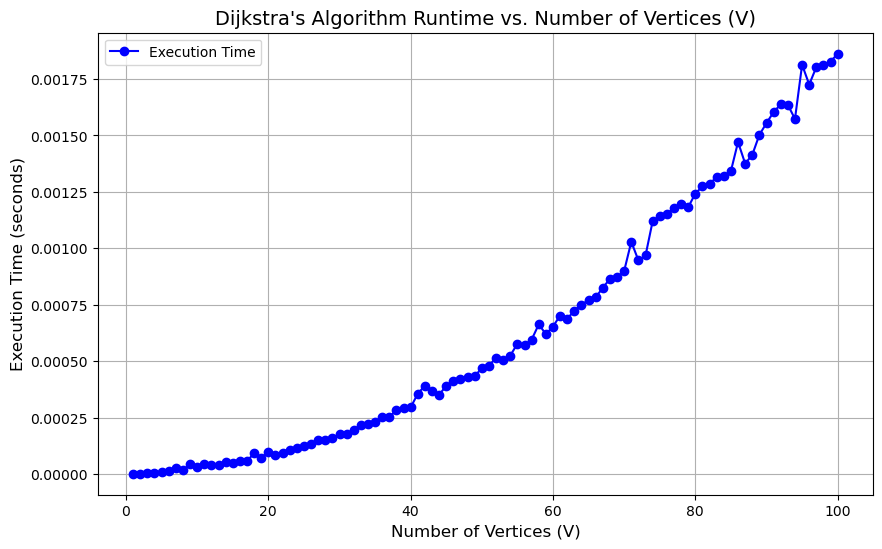

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(V_range, execution_times, marker='o', label='Execution Time', color='b')
plt.title("Dijkstra's Algorithm Runtime vs. Number of Vertices (V)", fontsize=14)
plt.xlabel("Number of Vertices (V)", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Conclusion: As we can see from both Theoretical Time Complexity Graph and Empirical Time Complexity Graph, both of the graphs look similar, confirming that the theoretical model is able to accurately predict the performance of Dijkstra's algorithm as the number of vertices V increases.

## Question B

### Code

In [10]:
def generate_random_graph_adj_list(num_vertices, max_weight=10, sparsity=0.5):
    """Generates a random directed graph as an adjacency list."""
    adj_list = {i: [] for i in range(num_vertices)}
    
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and random.random() < sparsity:  # Avoid self-loops and control edge creation
                weight = random.randint(1, max_weight)  # Random weight between 1 and max_weight
                adj_list[i].append((j, weight))  # Add edge from i to j with the specified weight

    return adj_list

In [11]:
import heapq
import time

def dijkstra_list(adj_list, source):
    start_time = time.perf_counter()
    
    num_vertices = len(adj_list)
    dist = [float('inf')] * num_vertices
    dist[source] = 0
    pq = [(0, source)]  # Priority queue as min-heap (distance, vertex)
    predecessors = [None] * num_vertices  # To store the shortest path tree
    
    while pq:
        current_dist, u = heapq.heappop(pq)

        # If this distance is not the smallest one, we skip
        if current_dist > dist[u]:
            continue

        for v, weight in adj_list[u]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                predecessors[v] = u
                heapq.heappush(pq, (dist[v], v))
    
    end_time = time.perf_counter()
    return dist, predecessors, (end_time - start_time)

def reconstruct_path(predecessors, target_vertex):
    path = []
    current = target_vertex
    while current is not None:
        path.append(current)
        current = predecessors[current]
    path.reverse()
    return path


In [12]:
graph_adj_list = {
    0: [(1, 7), (5, 2)],
    1: [(2, 6), (5, 1)],
    2: [(3, 5)],
    3: [(4, 2)],
    4: [(5, 3)],
    5: []
}

source_vertex = 0
target_vertex = 4

# Run Dijkstra
distances, predecessors, execution_time = dijkstra_list(graph_adj_list, source_vertex)

# Print distances and execution time
print(f"Distances from vertex {source_vertex}: {distances}")
print(f"Execution time: {execution_time:.6f} seconds")

# Reconstruct and print the path from source to target
path = reconstruct_path(predecessors, target_vertex)
print(f"Shortest path from {source_vertex} to {target_vertex}: {path}")

Distances from vertex 0: [0, 7, 13, 18, 20, 2]
Execution time: 0.000011 seconds
Shortest path from 0 to 4: [0, 1, 2, 3, 4]


In [13]:
def analyze_graphs(num_vertices, max_weight, num_graphs):
    for i in range(num_graphs):
        graph_adj_list = generate_random_graph_adj_list(num_vertices, max_weight)
        distances, predecessors, execution_time = dijkstra_list(graph_adj_list, 0)
        print(f"Graph {i + 1}:")
        print(f"Distances from vertex 0: {distances}")
        print(f"Execution time: {execution_time:.6f} seconds")
        path = reconstruct_path(predecessors, target_vertex)
        print(f"Shortest path from 0 to {target_vertex}: {path}\n")

# Analyze random graphs with 10 vertices, max weight of 40, and 6 different graphs
analyze_graphs(10, 40, 6)

Graph 1:
Distances from vertex 0: [0, 23, 15, 17, 9, 21, 6, 18, 8, 2]
Execution time: 0.000043 seconds
Shortest path from 0 to 4: [0, 9, 6, 8, 4]

Graph 2:
Distances from vertex 0: [0, 20, 32, 26, 33, 34, 18, 16, 28, 29]
Execution time: 0.000011 seconds
Shortest path from 0 to 4: [0, 3, 8, 4]

Graph 3:
Distances from vertex 0: [0, 26, 38, 31, 16, 24, 26, 6, 18, 26]
Execution time: 0.000009 seconds
Shortest path from 0 to 4: [0, 7, 4]

Graph 4:
Distances from vertex 0: [0, 42, 44, 40, 41, 16, 24, 3, 27, 11]
Execution time: 0.000010 seconds
Shortest path from 0 to 4: [0, 7, 4]

Graph 5:
Distances from vertex 0: [0, 6, 30, 4, 14, 13, 23, 11, 12, 28]
Execution time: 0.000008 seconds
Shortest path from 0 to 4: [0, 7, 4]

Graph 6:
Distances from vertex 0: [0, 26, 19, 16, 25, 23, 9, 32, 25, 24]
Execution time: 0.000008 seconds
Shortest path from 0 to 4: [0, 4]



### Theorectical Analysis

Graph Initialization: 
- The adjacency list representation takes O(V+E)

Priority Queue Operations:
- Extracting Minimum: Extracting the vertex with the smallest distance from the priority queue takes O(LogV). Total for            extracting minimum after operating V times give O(VLogV)

Updating:
- For each v, we update its distance. Total for updating distances gives O(ELogV)

Conclusion: 
- The overall time complexity of Dijkstra’s algorithm with an adjacency list and minimizing heap is O(VLogV + ELogV)


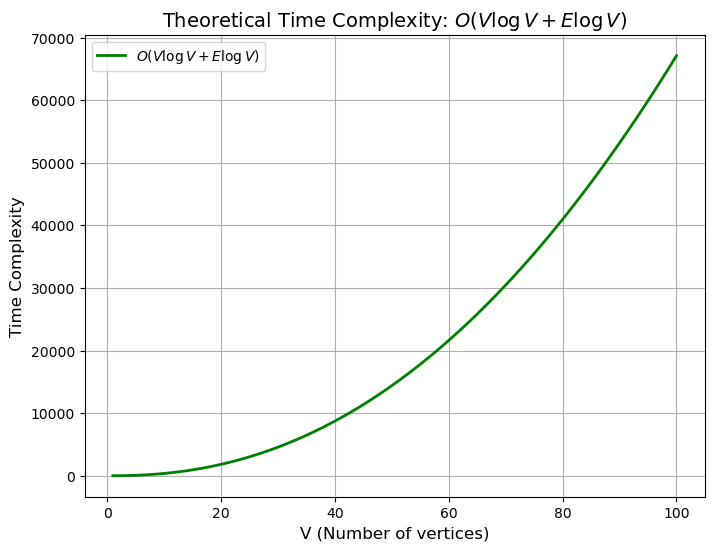

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate V values (number of vertices) 
V_values = np.arange(1, 101, 1)

# Calculate E values, assuming E is proportional to V^2
E_values = V_values ** 2

# Calculate the theoretical time complexity O(V log V + E log V)
time_complexity_values = V_values * np.log2(V_values) + E_values * np.log2(V_values)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(V_values, time_complexity_values, label="$O(V \\log V + E \\log V)$", color="g", linewidth=2)
plt.title("Theoretical Time Complexity: $O(V \\log V + E \\log V)$", fontsize=14)
plt.xlabel("V (Number of vertices)", fontsize=12)
plt.ylabel("Time Complexity", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()



### Empirical Analysis


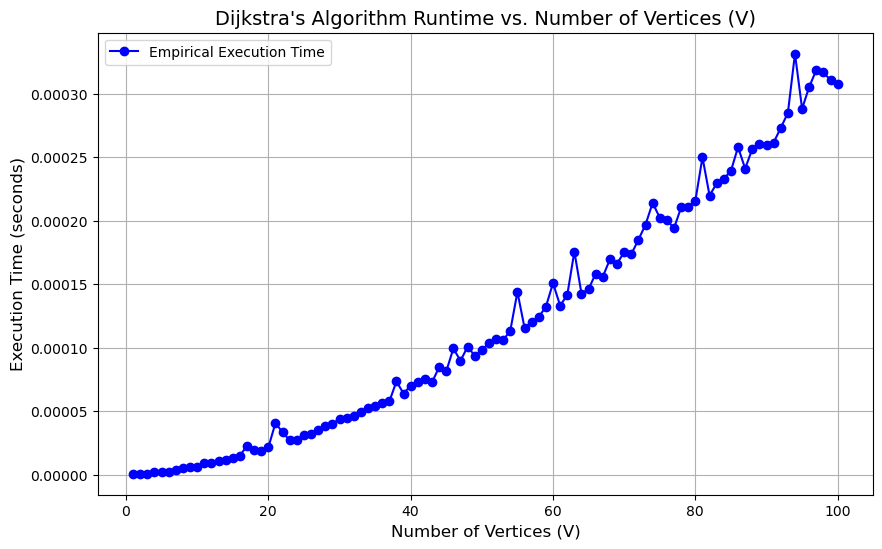

In [15]:
# Use a regular number format for the Y-axis
#plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
#plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

V_range = range(1, 101)
execution_times = []

for V in V_range:
    total_times = 0
    for _ in range(10):
        graph = generate_random_graph_adj_list(V)
        distances,predecessors, execution_time  = dijkstra_list(graph, 0)
        total_times += execution_time
    average_times = total_times/10
    execution_times.append(average_times)
    
plt.figure(figsize=(10, 6))
plt.plot(V_range, execution_times, marker='o', label="Empirical Execution Time", color="b")
plt.title("Dijkstra's Algorithm Runtime vs. Number of Vertices (V)", fontsize=14)
plt.xlabel("Number of Vertices (V)", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.grid(True)
plt.legend()

Conclusion: As we can see from both Theoretical Time Complexity Graph and Empirical Time Complexity Graph, both of the graphs look similar, confirming that the theoretical model is able to accurately predict the performance of Dijkstra's algorithm as the number of vertices V increases.

## Question C

### Graph Generator

In [16]:
import random

def generate_random_graph_list(num_vertices, max_weight=10, sparsity=0.5):
    """Generates a random directed graph as an adjacency list."""
    adj_list = {i: [] for i in range(num_vertices)}
    
    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and random.random() < sparsity:  # Avoid self-loops and control edge creation
                weight = random.randint(1, max_weight)  # Random weight between 1 and max_weight
                adj_list[i].append((j, weight))  # Add edge from i to j with the specified weight

    return adj_list

def adj_list_to_matrix(adj_list, num_vertices):
    """Converts an adjacency list to an adjacency matrix."""
    matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    for vertex, neighbors in adj_list.items():
        for neighbor, weight in neighbors:
            matrix[vertex][neighbor] = weight  # Set the weight for the edge
    
    return matrix

# Generate graphs with different levels of edge density
def generate_graph_by_density(num_vertices, max_weight=10, category='medium'):
    """Generates a graph with low, medium, or high edge density."""
    if category == 'low':
        sparsity = 0.1  # Low edge density
    elif category == 'medium':
        sparsity = 0.5  # Medium edge density
    elif category == 'high':
        sparsity = 1.0  # High edge density
    else:
        raise ValueError("Invalid category. Choose from 'low', 'medium', or 'high'.")
        
    return generate_random_graph_list(num_vertices, max_weight, sparsity)

### Low Density Graph

In [17]:
V_range = range(1, 101)
execution_times_matrix_low = []
execution_times_list_low = []

for V in V_range:
    total_times_ml = 0
    total_times_ll = 0
    for _ in range(10):
        low_density_graph_list = generate_graph_by_density(V, category='low')
        low_density_graph_matrix = adj_list_to_matrix(low_density_graph_list, V)
        
        distances_m, predecessors_m, execution_time_ml  = dijkstra_matrix(low_density_graph_matrix, 0)
        distances_l, predecessors_l, execution_time_ll  = dijkstra_list(low_density_graph_list, 0)

        total_times_ml += execution_time_ml
        total_times_ll +=execution_time_ll
        
    average_times_ml = total_times_ml/10
    average_times_ll = total_times_ll/10
    execution_times_matrix_low.append(average_times_ml)
    execution_times_list_low.append(average_times_ll)

### Average Density Graph

In [18]:
V_range = range(1, 101)
execution_times_matrix_average = []
execution_times_list_average = []

for V in V_range:
    total_times_ma = 0
    total_times_la = 0
    for _ in range(10):
        low_density_graph_list = generate_graph_by_density(V, category='medium')
        low_density_graph_matrix = adj_list_to_matrix(low_density_graph_list, V)
        
        distances_m, predecessors_m, execution_time_ma  = dijkstra_matrix(low_density_graph_matrix, 0)
        distances_l, predecessors_l, execution_time_la  = dijkstra_list(low_density_graph_list, 0)
        total_times_ma += execution_time_ma
        total_times_la +=execution_time_la
        
    average_times_ma = total_times_ma/10
    average_times_la = total_times_la/10
    execution_times_matrix_average.append(average_times_ma)
    execution_times_list_average.append(average_times_la)

### High Density Graph

In [19]:
V_range = range(1, 101)
execution_times_matrix_high = []
execution_times_list_high = []

for V in V_range:
    total_times_mh = 0
    total_times_lh = 0
    for _ in range(10):
        low_density_graph_list = generate_graph_by_density(V, category='high')
        low_density_graph_matrix = adj_list_to_matrix(low_density_graph_list, V)
        
        distances_m, predecessors_m, execution_time_mh  = dijkstra_matrix(low_density_graph_matrix, 0)
        distances_l, predecessors_l, execution_time_lh  = dijkstra_list(low_density_graph_list, 0)
        total_times_mh += execution_time_mh
        total_times_lh +=execution_time_lh
        
    average_times_mh = total_times_mh/10
    average_times_lh = total_times_lh/10
    execution_times_matrix_high.append(average_times_mh)
    execution_times_list_high.append(average_times_lh)

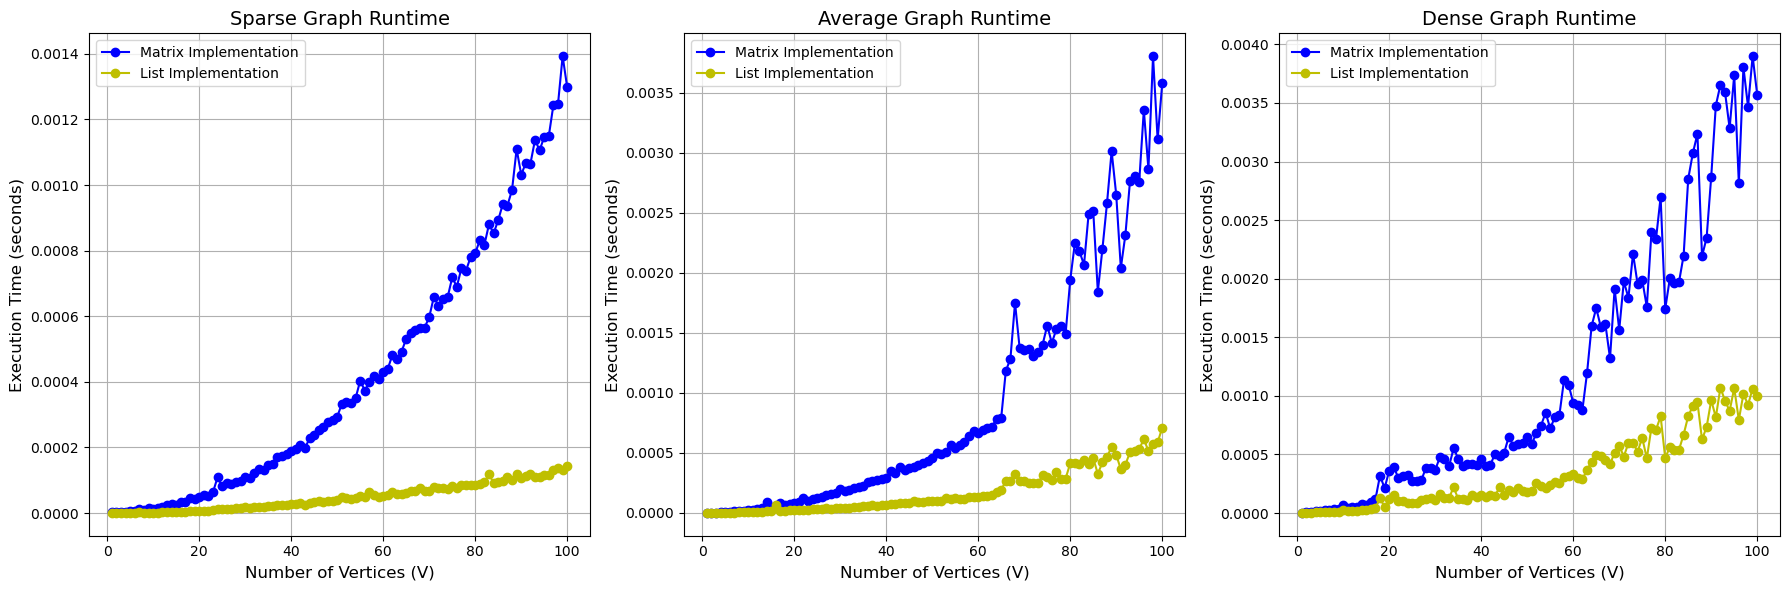

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Sparse Graph
axs[0].plot(V_range, execution_times_matrix_low, marker='o', label='Matrix Implementation', color='b')
axs[0].plot(V_range, execution_times_list_low, marker='o', label='List Implementation', color='y')
axs[0].set_title("Sparse Graph Runtime", fontsize=14)
axs[0].set_xlabel("Number of Vertices (V)", fontsize=12)
axs[0].set_ylabel("Execution Time (seconds)", fontsize=12)
axs[0].grid(True)
axs[0].legend()

# Plot for Average Graph
axs[1].plot(V_range, execution_times_matrix_average, marker='o', label='Matrix Implementation', color='b')
axs[1].plot(V_range, execution_times_list_average, marker='o', label='List Implementation', color='y')
axs[1].set_title("Average Graph Runtime", fontsize=14)
axs[1].set_xlabel("Number of Vertices (V)", fontsize=12)
axs[1].set_ylabel("Execution Time (seconds)", fontsize=12)
axs[1].grid(True)
axs[1].legend()

# Plot for Dense Graph
axs[2].plot(V_range, execution_times_matrix_high, marker='o', label='Matrix Implementation', color='b')
axs[2].plot(V_range, execution_times_list_high, marker='o', label='List Implementation', color='y')
axs[2].set_title("Dense Graph Runtime", fontsize=14)
axs[2].set_xlabel("Number of Vertices (V)", fontsize=12)
axs[2].set_ylabel("Execution Time (seconds)", fontsize=12)
axs[2].grid(True)
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Conclusion

1. An adjacency matrix with an array-based priority queue (Part a):

- Time complexity:
  - Adjacency Matrix: Accessing the edge between any two nodes is O(1), but since we must examine all nodes to find neighbors,       the complexity to check all nodes is O(V).
  - Array-based Priority Queue: Insertion into the array-based priority queue is O(1), but extracting the minimum element           requires linear time O(V) since you must search through the array to find the smallest element.
  - Overall Complexity: The overall time complexity of Dijkstra's algorithm with an adjacency matrix and array priority queue       is O(V^2). For dense graphs (where |E| ≈ V²), this approach works reasonably well because accessing edges is constant time,     and the higher number of edges doesn't significantly increase the computation.

2. An adjacency list with a minimizing heap-based priority queue (Part b):

- Time complexity:
  - Adjacency List: Accessing all neighbors of a node is O(V + E), where V is the number of vertices and E is the number of         edges.
  - Min-Heap Priority Queue: Inserting an element into a heap takes O(log V), and removing the smallest element also takes 
    O(log V).
  - Overall Complexity: The overall time complexity for this implementation is O((V + E) log V). This is much more efficient for     sparse graphs (where |E| << V²) because heap operations are faster than the array-based ones.

  Conclusion:
  - Adjacency Matrix + Array (Part a) is more suited for dense graphs, where the number of edges is close to V^2, and the           simplicity of the array-based priority queue doesn't impact performance as much.
  - Adjacency List + Heap (Part b) is ideal for sparse graphs, where the number of edges is much smaller than V^2. The heap         provides significant performance improvements by minimizing the time spent on priority queue operations.
  - As for the average case graph, th adjacency matrix with an array based priority queue implementation is not particularly         optimized, as it incurs the same quadratic complexity that dense graphs would, even though average graphs may not have as       many edges.The use of a minimizing heap ensures that operations on the priority queue are logarithmic in the number of           vertices, making it more scalable than the array-based approach.
  - Implementation B (Adjacency List + Heap) is still the better option because it scales better as the graph becomes larger.       The time complexity O((V + E) log V) remains more favorable than the O(V^2) complexity of Implementation A, even when the       number of edges is moderate.
  
  Thus, for sparse graphs, Implementation B (Adjacency List + Heap) is better due to its superior efficiency in handling smaller   edge sets, while Implementation A (Adjacency Matrix + Array) is preferred for dense graphs due to its simplicity and quick       edge lookups.
  
  